In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
sns.set(style='white', context='notebook', palette='deep')

In [3]:
dataset = pd.read_csv("Expense.csv")
dataset.head(1)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K


# Data Analysis and Preparation

### Data Dimension

In [4]:
print('No of rows :',dataset.shape[0])
print('No of columns :',dataset.shape[1])

No of rows : 5000
No of columns : 14


### Data Types

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   int64 
 1   workclass       5000 non-null   object
 2   education       5000 non-null   object
 3   education-num   5000 non-null   int64 
 4   marital-status  5000 non-null   object
 5   occupation      5000 non-null   object
 6   relationship    5000 non-null   object
 7   race            5000 non-null   object
 8   sex             5000 non-null   object
 9   capital-gain    5000 non-null   int64 
 10  capital-loss    5000 non-null   int64 
 11  hours-per-week  5000 non-null   int64 
 12  native-country  5000 non-null   object
 13  Expense         5000 non-null   object
dtypes: int64(5), object(9)
memory usage: 547.0+ KB


### Summary Statistics

In [6]:
dataset.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,38.656000,10.065000,1104.080000,90.032800,40.566200
std,13.698292,2.558141,7579.674371,404.168991,12.154191
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3004.000000,99.000000


### Unique values

In [7]:
for i in dataset.columns:
    print(i,dataset[i].unique())

age [39 20 50 38 23 31 58 66 54 26 51 34 42 48 33 22 19 41 56 30 45 27 32 76
 37 90 43 44 24 28 64 36 61 53 52 49 35 17 29 21 62 68 69 60 63 46 59 40
 25 65 88 47 18 55 75 57 73 67 71 70 72 77 74 78 80 81 82 79 83]
workclass [' Self-emp-inc' ' Private' ' State-gov' ' Local-gov' ' Self-emp-not-inc'
 ' ?' ' Federal-gov' ' Without-pay' ' Never-worked']
education [' Bachelors' ' Some-college' ' Doctorate' ' HS-grad' ' Assoc-voc'
 ' Masters' ' 7th-8th' ' 10th' ' Assoc-acdm' ' 9th' ' 11th' ' Prof-school'
 ' 12th' ' 1st-4th' ' 5th-6th' ' Preschool']
education-num [13 10 16  9 11 14  4  6 12  5  7 15  8  2  3  1]
marital-status [' Married-civ-spouse' ' Never-married' ' Separated' ' Divorced'
 ' Widowed' ' Married-spouse-absent' ' Married-AF-spouse']
occupation [' Exec-managerial' ' Other-service' ' Prof-specialty' ' Adm-clerical'
 ' Machine-op-inspct' ' Craft-repair' ' Sales' ' Transport-moving'
 ' Handlers-cleaners' ' Tech-support' ' ?' ' Priv-house-serv'
 ' Farming-fishing' ' Protective-serv

### Missing Values

In [8]:
dataset[dataset == ' ?'] = np.nan

In [9]:
dataset.isnull().sum()

age                 0
workclass         320
education           0
education-num       0
marital-status      0
occupation        321
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     98
Expense             0
dtype: int64

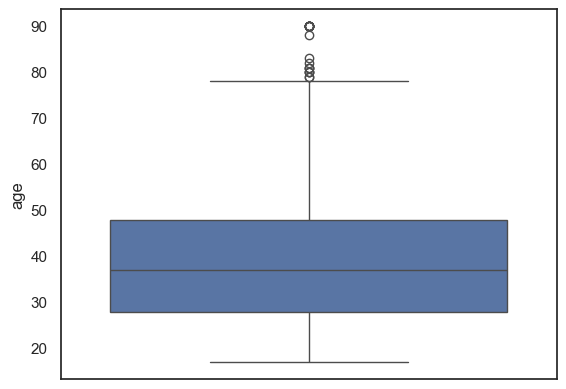

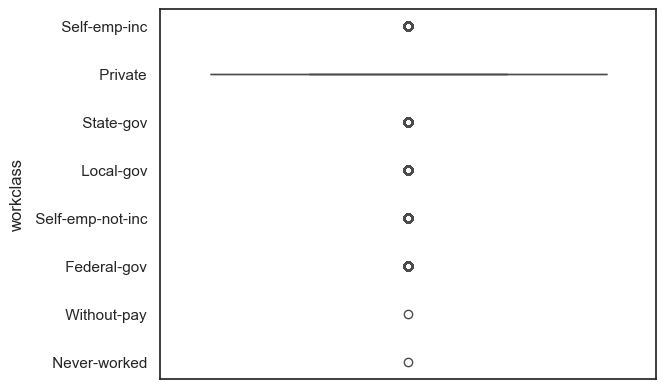

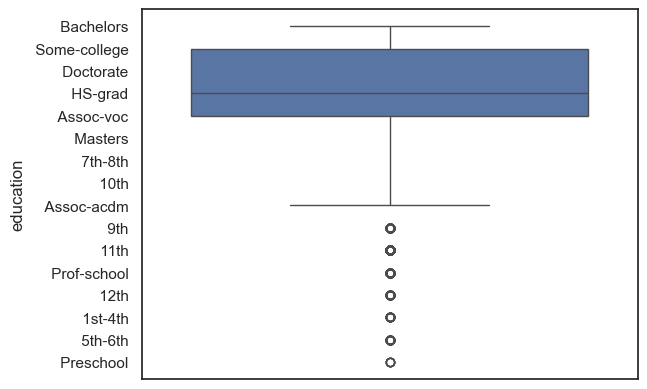

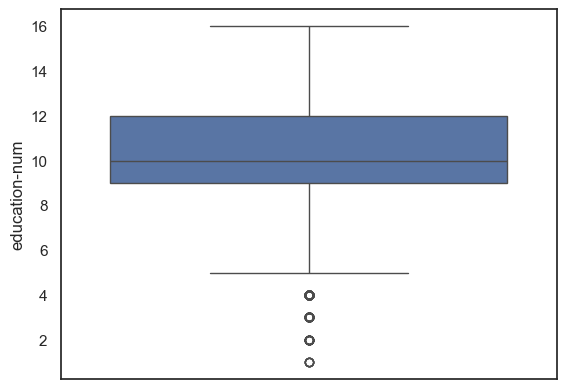

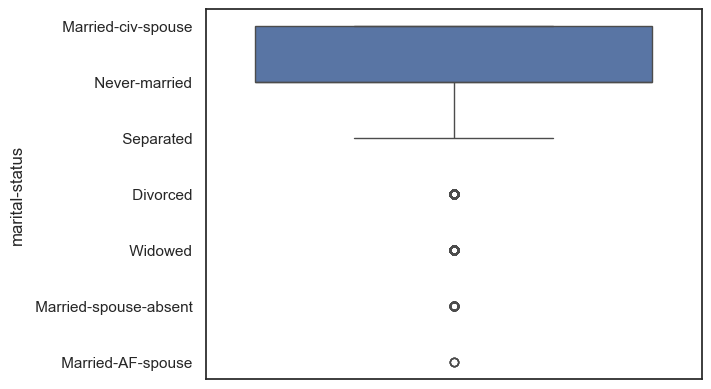

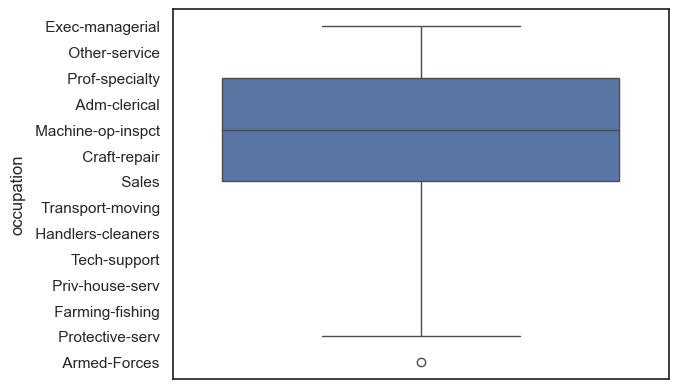

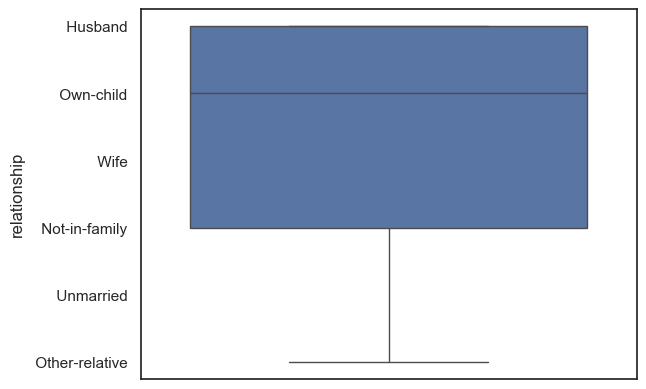

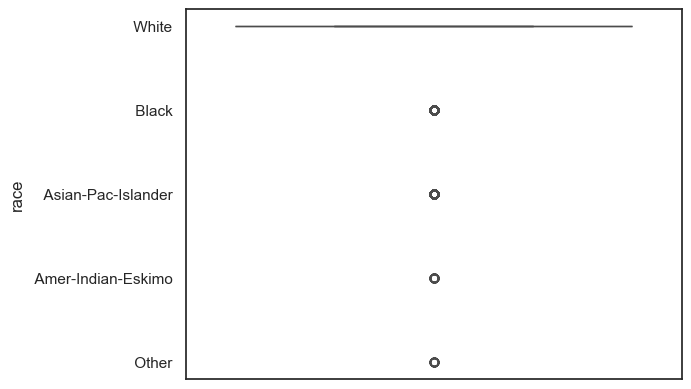

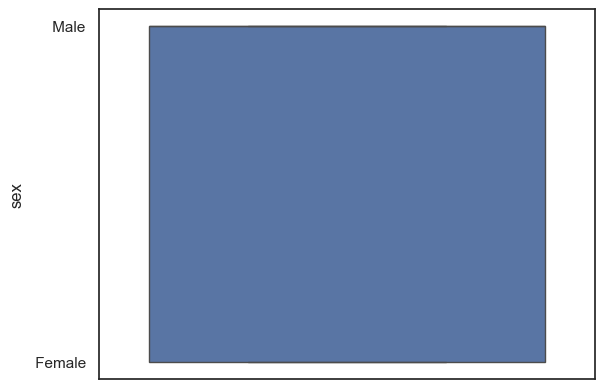

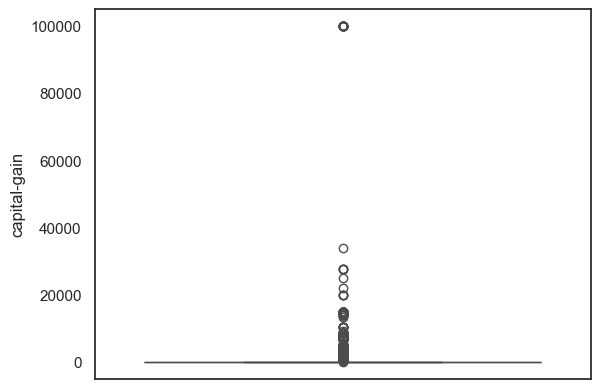

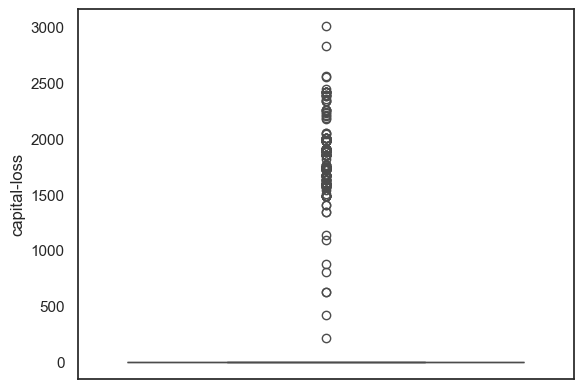

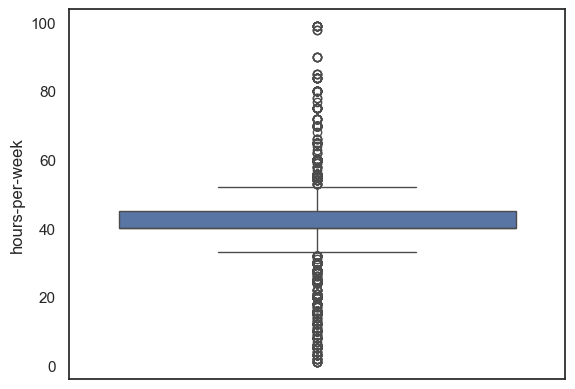

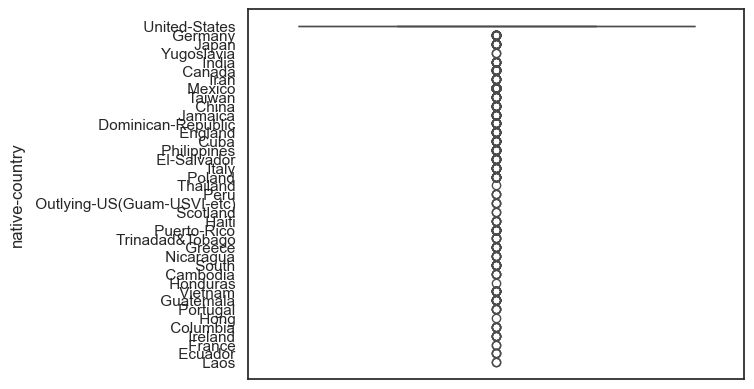

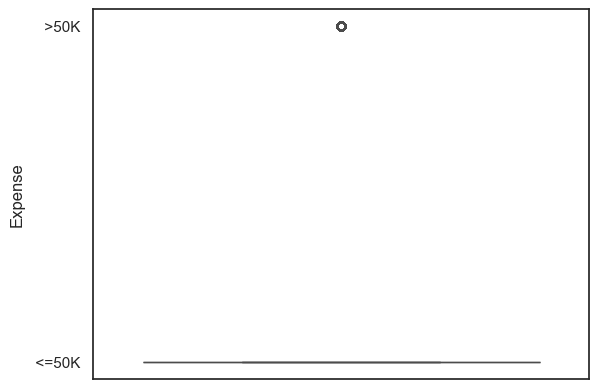

In [10]:
for i in dataset.columns:
    sns.boxplot(dataset[i])
    plt.show()

In [11]:
dataset.Expense.unique()

array([' >50K', ' <=50K'], dtype=object)

In [12]:
dataset.Expense.replace({' >50K':1,' <=50K':0},inplace=True)

In [13]:
dataset.Expense.value_counts()

Expense
0    3776
1    1224
Name: count, dtype: int64

<Axes: xlabel='Expense'>

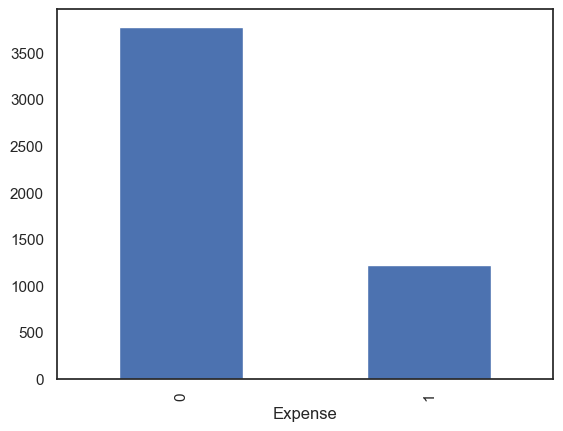

In [14]:
dataset.Expense.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

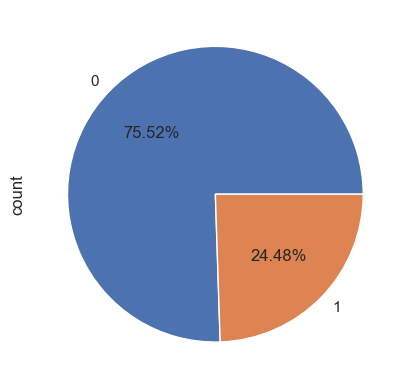

In [15]:
dataset.Expense.value_counts().plot(kind='pie',autopct = "%.2f%%")

### Impute missing values with mode

In [16]:
for col in ['workclass', 'occupation', 'native-country']:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

In [17]:
dataset.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Expense           0
dtype: int64

### Correlation

<Axes: >

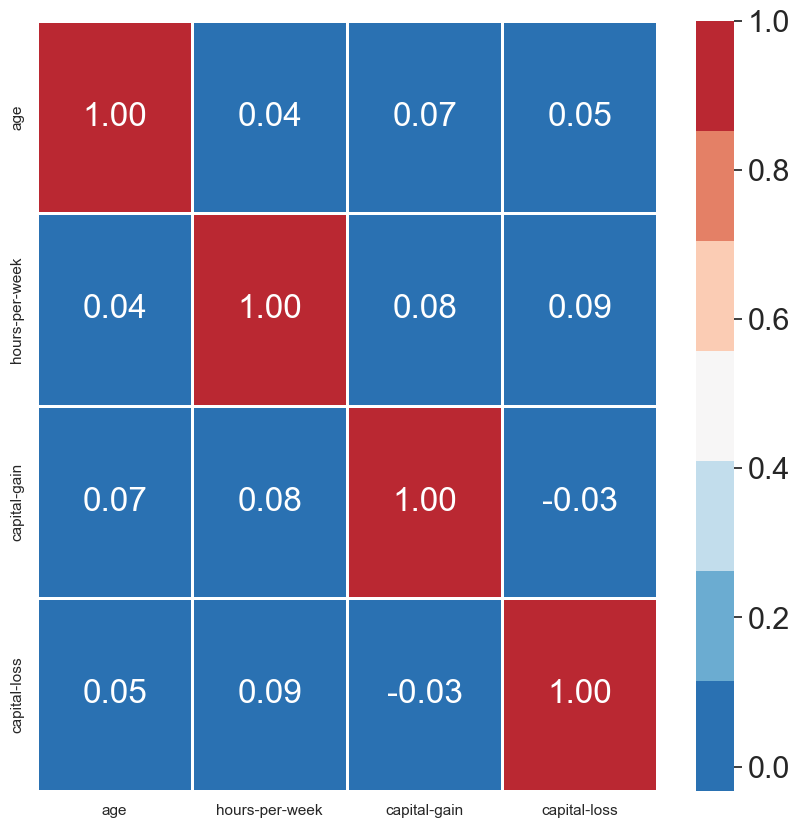

In [18]:
numeric_columns = ['age','hours-per-week','capital-gain','capital-loss']

fig, axe = plt.subplots(figsize=(10,10))
sns.set_context("poster")
sns.set(font_scale=2)
map1 = sns.color_palette("RdBu_r", 7)
sns.heatmap(dataset[numeric_columns].corr(),annot=True, fmt='.2f',linewidths=2,cmap = map1)

## Feature Engineering

In [19]:
label_encoder = LabelEncoder()
dataset['occupation1'] = label_encoder.fit_transform(dataset.occupation)
dataset['workclass1'] = label_encoder.fit_transform(dataset.workclass)
dataset['relationship1'] = label_encoder.fit_transform(dataset.relationship)
dataset['race1'] = label_encoder.fit_transform(dataset.race)
dataset['native-country1'] = label_encoder.fit_transform(dataset['native-country'])
dataset['sex'] = label_encoder.fit_transform(dataset['sex'])
dataset['marital-status1'] = label_encoder.fit_transform(dataset['marital-status'])
dataset['education1'] = label_encoder.fit_transform(dataset['education'])

In [20]:
dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,hours-per-week,native-country,Expense,occupation1,workclass1,relationship1,race1,native-country1,marital-status1,education1
0,39,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,15024,...,50,United-States,1,3,4,0,4,36,2,9
1,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,1,0,...,40,United-States,0,7,3,3,4,36,4,15
2,50,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,1,0,...,65,United-States,1,9,3,0,4,36,2,10
3,38,State-gov,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,0,0,...,40,United-States,1,9,6,5,4,36,2,11
4,23,Local-gov,Bachelors,13,Never-married,Prof-specialty,Own-child,White,0,0,...,60,United-States,0,9,1,3,4,36,4,9


### Encoding of Categorical Variables

In [21]:
dataset["marital-status"] = dataset["marital-status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], 'Single')
dataset["marital-status"] = dataset["marital-status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married')
dataset["marital-status"] = dataset["marital-status"].map({"Married":1, "Single":0})
dataset["marital-status"] = dataset["marital-status"].astype(int)

In [22]:
label_encoder = LabelEncoder()
dataset['marital-status2'] = label_encoder.fit_transform(dataset['marital-status'])

In [23]:
Y=dataset.Expense
X=dataset[['age', 'education-num','sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country1', 
           'occupation1', 'workclass1', 'relationship1',
       'race1', 'marital-status2', 'education1']]

In [24]:
X

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,native-country1,occupation1,workclass1,relationship1,race1,marital-status2,education1
0,39,13,1,15024,0,50,36,3,4,0,4,1,9
1,20,10,1,0,0,40,36,7,3,3,4,0,15
2,50,16,1,0,1902,65,36,9,3,0,4,1,10
3,38,9,0,0,0,40,36,9,6,5,4,1,11
4,23,13,0,0,0,60,36,9,1,3,4,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,38,9,1,0,0,40,36,6,3,0,4,1,11
4996,26,10,0,0,0,40,36,12,3,3,4,0,15
4997,20,7,1,0,0,60,36,13,3,3,4,0,1
4998,24,9,1,0,0,60,23,2,3,0,4,1,11


# Model Building

### Split the data into training and test sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,stratify = Y,random_state=0)

In [26]:
logreg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.399595
         Iterations 8


In [27]:
# print the summary of the model
print(logreg.summary()) 

                           Logit Regression Results                           
Dep. Variable:                Expense   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Sat, 23 Nov 2024   Pseudo R-squ.:                  0.2821
Time:                        17:24:13   Log-Likelihood:                -1398.6
converged:                       True   LL-Null:                       -1948.1
Covariance Type:            nonrobust   LLR p-value:                8.920e-228
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
age                 0.0024      0.004      0.651      0.515      -0.005       0.009
education-num       0.1601      0.019      8.444      0.000       0.123       0.197
sex                -0.6982      

In [28]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)

In [29]:
# print the y_pred_prob
y_pred_prob.head()

2315    0.058936
4585    0.492697
2829    0.087675
3888    0.197696
1081    0.086324
dtype: float64

In [30]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [31]:
# print the first five observations of y_pred
y_pred[0:5]

[0, 0, 0, 0, 0]

### Confusion Matrix

In [32]:
cm = confusion_matrix(y_test, y_pred)

In [33]:
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

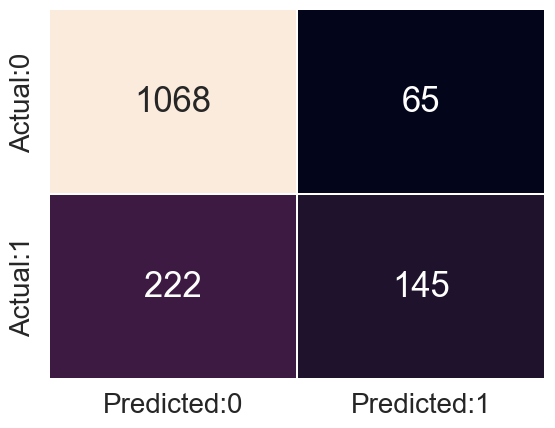

In [34]:
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [35]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

### Performance Matrix

In [36]:
# calculate the precision value
precision = TP / (TP+FP)

# print the value
precision

0.6904761904761905

In [37]:
# calculate the recall value
recall = TP / (TP+FN)

# print the value
recall

0.39509536784741145

In [38]:
# calculate the specificity value
specificity = TN / (TN+FP)

# print the value
specificity

0.942630185348632

In [39]:
# calculate the f1_score
f1_score = 2*((precision*recall)/(precision+recall))

# print the f1_score
f1_score

0.5025996533795495

In [40]:
# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy

0.8086666666666666

# Naive Bayes

In [41]:
dt_default = GaussianNB()
dt_default.fit(X_train, y_train)

GaussianNB()

In [42]:
# Making predictions
y_pred_default = dt_default.predict(X_test)

In [43]:
# Printing classification report
print(classification_report(y_test, y_pred_default))
print(accuracy_score(y_test, y_pred_default)) 

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1133
           1       0.69      0.37      0.48       367

    accuracy                           0.80      1500
   macro avg       0.76      0.66      0.68      1500
weighted avg       0.79      0.80      0.78      1500

0.8046666666666666


##### The overall accuracy is 80.46%. The fit is quite good. As we both the classes of target variable >50K & <=50K are of same importance, we may look into the accuracy as the evaluation matrix of the problem or we can look it the weigthed average f1-score.
##### Weigthed average f1-score is 78 % & Accuracy is 80%

##### We can conclude that the overall fit is quite good.

#### Cohens kappa

In [44]:
cohen_kappa_score(y_test, y_pred_default)

0.37133817000045777

One of the reason behind the under-performance of the model could be the insufficient proportion of diffrent classes in target variable i.e. >50K & <=50K.

We would apply the SMoTE technique on the training set. Using SMoTE technique, we can generate the number of observation in the >50K class in the target variable.

## Smote

In [45]:
X_trainc=X_train.copy()
X_testc=X_test.copy()
y_trainc=y_train.copy()
y_testc=y_test.copy()

In [46]:
# Applying SMoTE on the training set
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train,y_train = smt.fit_resample(X_train,y_train)

In [47]:
y_train.value_counts()

Expense
0    2643
1    2643
Name: count, dtype: int64

# Naive Bayes after Smote technique¶

In [48]:
dt_default = GaussianNB()
dt_default.fit(X_train, y_train)

GaussianNB()

In [49]:
y_pred_default = dt_default.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred_default))
print(accuracy_score(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1133
           1       0.67      0.44      0.54       367

    accuracy                           0.81      1500
   macro avg       0.76      0.69      0.71      1500
weighted avg       0.80      0.81      0.80      1500

0.8113333333333334


As even after applying SMoTE the model did not improve, now,we need to think about applying a different model.
We would fit Decision Tree on the dataset

# K-Nearest Neighbour¶

In [51]:
knn_classification = KNeighborsClassifier(n_neighbors = 7)

In [52]:
# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

### Define a function to plot the confusion matrix

In [53]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.show()

## Build Confusion Matrix

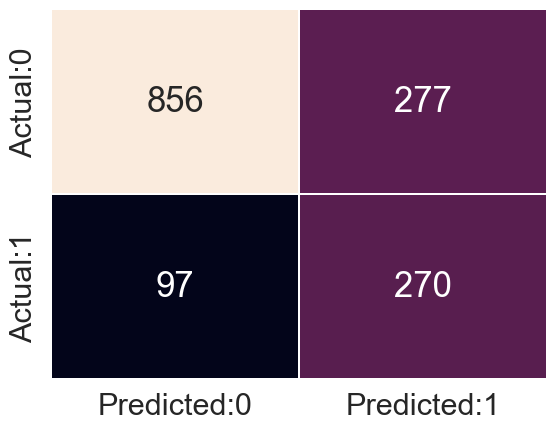

In [54]:
plot_confusion_matrix(knn_model)

### Define a function to plot the ROC curve

In [55]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

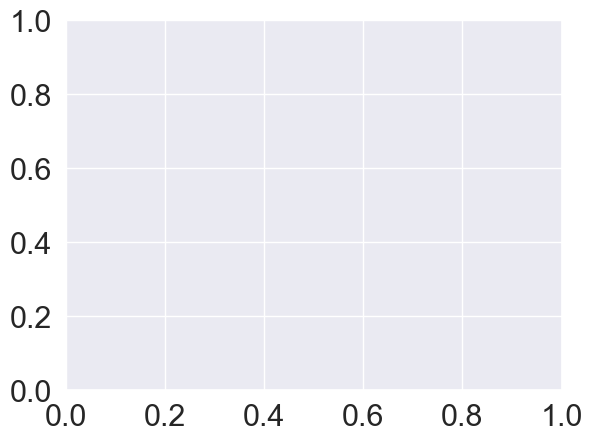

In [56]:
plt.grid(True)

## Performance Matrix

In [57]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))
    

In [58]:
test_report = get_test_report(knn_model)

# print the performace measures
print(test_report)


              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1133
           1       0.49      0.74      0.59       367

    accuracy                           0.75      1500
   macro avg       0.70      0.75      0.71      1500
weighted avg       0.80      0.75      0.76      1500



## ROC Curve

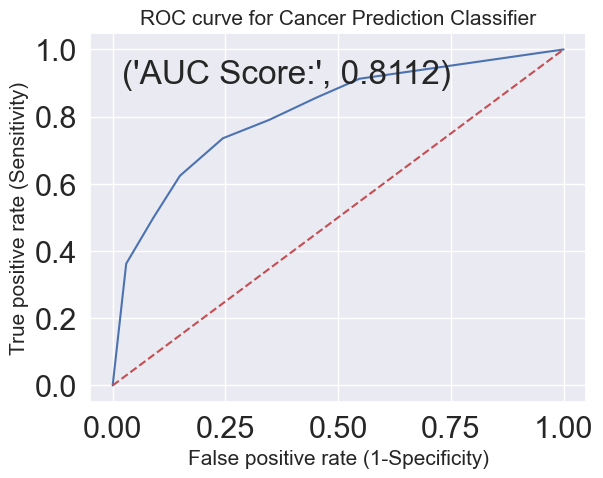

In [59]:
plot_roc(knn_model)

### Optimal Value of K (using GridSearchCV)

In [60]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 

knn_classification = KNeighborsClassifier()

knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 1} 



In [61]:
# pass the knn model using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(knn_grid))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      1133
           1       0.55      0.62      0.58       367

    accuracy                           0.78      1500
   macro avg       0.71      0.73      0.72      1500
weighted avg       0.79      0.78      0.79      1500



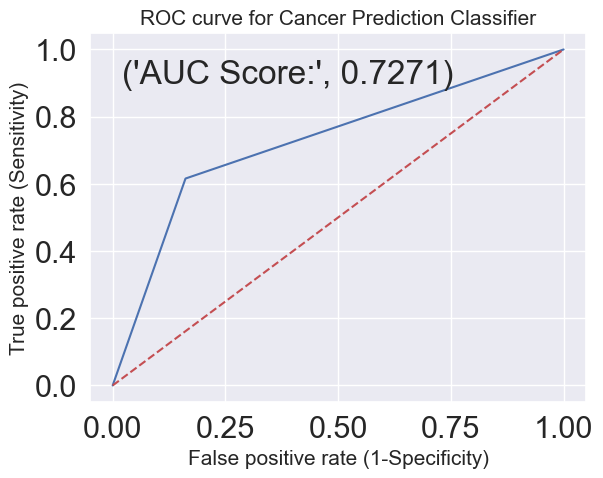

In [62]:
# pass the knn model to the function
plot_roc(knn_grid)

# Decision Tree

In [63]:
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
y_pred_default = dt_default.predict(X_test)

In [65]:
print(classification_report(y_test, y_pred_default))
print('accuracy_score:',accuracy_score(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1133
           1       0.57      0.62      0.59       367

    accuracy                           0.79      1500
   macro avg       0.72      0.73      0.73      1500
weighted avg       0.80      0.79      0.79      1500

accuracy_score: 0.7913333333333333


## Comparison Betweeen models

In [66]:
#This is a classical classification problem. F1 score, Precison Recall would be the right metric for evaluation 
# Oversampling the minority class has increasd the performance of the base model
# The key risk in this above method is oversampling as it makes the model to overfit 
# Using better and heavy classifiers can improve the accuracy, and good amount parameter optimization

In [67]:
outcome = []
Modelnames = []
models = []
models.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=50, max_features=4)))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Logistic Regression', LogisticRegression(solver='lbfgs')))
models.append(('Naive Bayes', GaussianNB()))
models.append(('KNN', KNeighborsClassifier(metric= 'manhattan', n_neighbors= 1)))
models.append(('XGBClassifier' , XGBClassifier(n_estimators=250)))

In [68]:
for name, model in models:
    kfoldCV = KFold(n_splits=5,shuffle=True,random_state=0)
    cv_r = cross_val_score(model, X_train, y_train, cv=kfoldCV, scoring='accuracy')
    outcome.append(cv_r)
    Modelnames.append(name)
    print("%s: %.2f%% (%.2f%%)" % (name, cv_r.mean()*100, cv_r.std()*100))

Random Forest Classifier: 87.97% (1.05%)
Decision Tree Classifier: 83.79% (1.51%)
Logistic Regression: 75.33% (2.56%)
Naive Bayes: 69.16% (2.50%)
KNN: 87.17% (0.48%)
XGBClassifier: 88.88% (1.03%)


# XGBoost Classifier

In [70]:
final_model = XGBClassifier(n_estimators=250)
final_model=final_model.fit(X_train,y_train)


In [71]:
# Making predictions
y_pred = final_model.predict(X_test)

print(classification_report(y_test, y_pred_default))

In [72]:
print(accuracy_score(y_test, y_pred))

0.832


##### The GradentBoost algorithm seems to perform the best for the dataset
##### The accuracy of the model is .83
##### The average precision is .83
##### The average recall is .83
##### The average F1 is .83
##### Which implies that the model is a good fit.¶

# Features Importance

In [73]:
feature_importances = pd.DataFrame(final_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [74]:
feature_importances

,importance
relationship1,0.277768
marital-status2,0.179982
capital-gain,0.175805
capital-loss,0.059789
education-num,0.047380
education1,0.044693
sex,0.038376
workclass1,0.038116
hours-per-week,0.029822
race1,0.029597


## Conclusion

Marital-status2, capital-gain & capital-loss,Relationship1 have the most inpact the consumption segregation of >50K & <=50K as 47% , 12% , 6% & 5% respectively.
Majority of the Married people have are more likely to belong to the >50K type.Where as single people are more likely to belong to <=50K type.

People with age greater than 40 are more likely to belong to the >50K type.Where as people with age less than 40 are more likely to belong to <=50K type.

People with Own-child (index 0) and Wife(index 5) relationship indices are more likely to belong to the >50K type.Where as People with Other-relative(index 1),Not-in-family (index 3) and Husband (index 4) relationship indices are more likely to belong to <=50K type.




# Deploy Final Model

In [75]:
with open('XGB Final model.pkl','wb') as file:
    pickle.dump(final_model,file)

<IPython.core.display.Javascript object>

In [76]:
with open('Encoder.pkl','wb') as file:
    pickle.dump(label_encoder,file)

<IPython.core.display.Javascript object>